## 4. Explorative Datenanalyse und statische Bewertung


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_parquet('df_prossesing.parquet')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_ord,CreditScore_ord,Balance_ord,EstimatedSalary_ord
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1,41 to 50,501 to 699,0 to 25000,100001 to 125000
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,41 to 50,501 to 699,50001 to 100000,100001 to 125000
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1,41 to 50,501 to 699,100001 to 200000,100001 to 125000
3,4,15701354,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0,31 to 40,501 to 699,0 to 25000,75001 to 100000
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,41 to 50,700 to 950,100001 to 200000,75001 to 100000


## 4.1 Klassenungleichgewichten
- **Die Zielvariable ist unausgeglichen. In dem Datensatz gibt es eine sehr ungleiche Verteilung der Klassen in der Zielspalte. Das könnte die Performance der Modellen beeinflussen.**

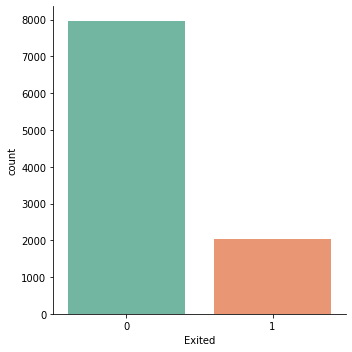

In [5]:
%matplotlib inline
sns.catplot(x="Exited",  kind="count", palette="Set2", data= df )

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## 4.2 Analyse der Spalte Exited

#### Männliche Kunden haben mehr Interesse als weibliche Kunden die Bank zu verlassen.

In [8]:
df[['Gender','Exited']].groupby('Gender').mean()

,Exited
Gender,
0,0.250715
1,0.164559


####  Kunden zwischen 41 und 50 Jahren tendieren die Bank zu verlassen

In [11]:
df[['Age_ord','Exited']].groupby('Age_ord').mean()

,Exited
Age_ord,
18 to 30,0.056180
31 to 40,0.107583
41 to 50,0.396535
51 to 60,0.252212
61 to 100,0.083333


#### Aktive Kunden  tendieren bei der Bank zu bleiben.

In [12]:
df[['IsActiveMember','Exited']].groupby('IsActiveMember').mean()

,Exited
IsActiveMember,
0,0.268509
1,0.142691


- **Kunden mit einem Balancescore zwischen 200001 und 250900 haben die Wahrscheinlichkeit von 0.558, die Bank zu verlassen.**

In [9]:
df[['Balance_ord','Exited']].groupby('Balance_ord').mean()

,Exited
Balance_ord,
0 to 25000,0.139111
25001 to 50000,0.318841
50001 to 100000,0.198807
100001 to 200000,0.250157
200001 to 250900,0.558824


- **Kunden aus Spanien zeigen mehr Interesse bei der Bank zu bleiben**

In [10]:
df[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
0,0.166734
1,0.161548
2,0.324432


- **Kunden, die 3 oder 4 Produkte der Bank haben, verlassen öfter die Bank.**

In [11]:
df[['NumOfProducts','Exited']].groupby('NumOfProducts').mean()

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


## 4.3 Analyse der Spalte outliers.
- **Beim Datensammeln wurde die Datei gelesen und untersucht. Es wurden outliers in den Spalten Age und CreditScore indentifiziert**


<AxesSubplot:xlabel='Age'>

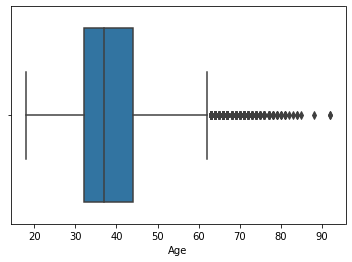

In [12]:
%matplotlib inline
sns.boxplot(df.Age)

<AxesSubplot:xlabel='CreditScore'>

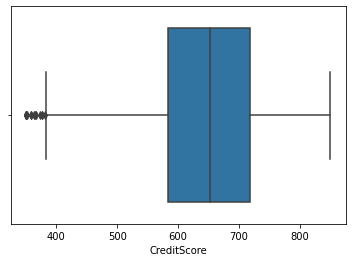

In [13]:
%matplotlib inline
sns.boxplot(df.CreditScore)


## 4.4 Interesse für die Spalte Gender


- **Weibliche Kunden haben die Tendenz bei der Bank zu bleiben.**

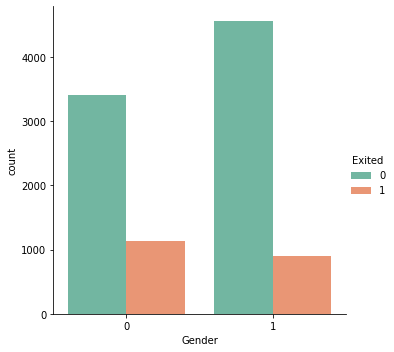

In [14]:
# male : 0 Female : 1
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "Exited" )

- **Die meisten Kunden kommen aus Spanien und sind weiblich.**

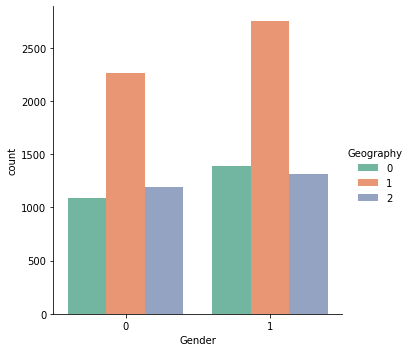

In [15]:
# male : 0 Female 1
# Geography Franca : 0 Espanha :1 Alemanha 2 
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "Geography" )

- **Die meinsten weibliche und männliche Kunden haben entweder 1 oder 2 Produkte**

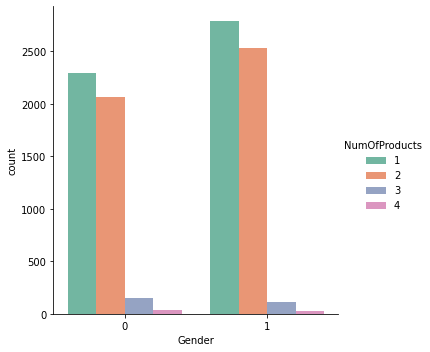

In [16]:
# 'Female': 0, 'Male': 1
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "NumOfProducts" )

- **Die meisten Kunden haben eine Karte**

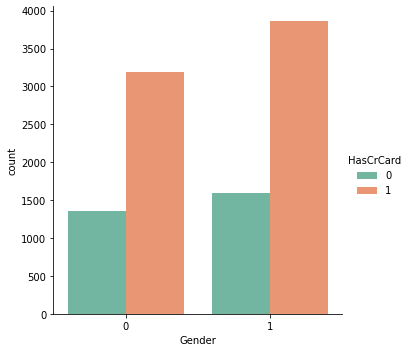

In [17]:
sns.catplot(x="Gender", kind="count", palette="Set2", data= df, hue = "HasCrCard" )

- **Weibliche Kunden haben die Tendenz bei der Bank aktiv zu werden.**

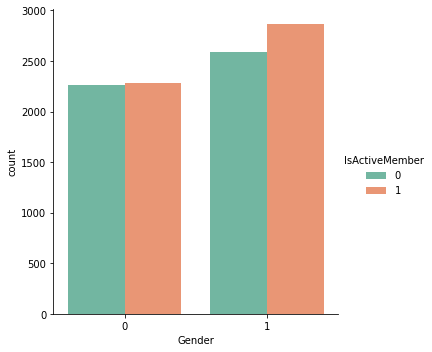

In [19]:
sns.catplot(x="Gender", kind="count",  palette="Set2",  data= df,  hue = "IsActiveMember" )


- **Die meisten Kunden sind seit 5 Jahren bei der Bank**

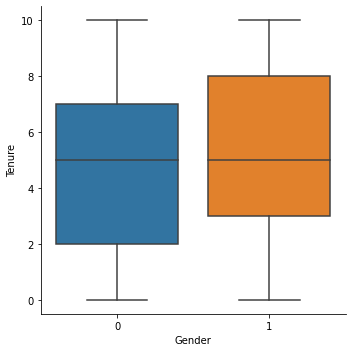

In [20]:
sns.catplot(x="Gender",  y="Tenure",  kind="box", data=df);

- **25% der männlichen Kunden verlassen die Bank**
- **16% der weiblichen Kunden verlassen die Bank**

In [21]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'Total Male' : [(df['Gender']== 1).sum()],
        'Total Female' :[ (df['Gender']== 0).sum()],
        'Total Male ohne Interesse %':[((df['Gender'] == 0) & (df['Exited']==1)).sum() / 
                                       (df['Gender'] == 0).sum()*100],
        'Total Famale ohne interesse %':[((df['Gender'] == 1) & (df['Exited']==1)).sum() / 
                                         (df['Gender'] == 1).sum()*100]
         }



dataframe = pd.DataFrame(dict)
  
# displaying the DataFrame
#display(dataframe)



dataframe

,Total Male,Total Female,Total Male ohne Interesse %,Total Famale ohne interesse %
0,5457,4543,25.071539,16.455928


## 4.5 Interesse für Age



- **Die meisten Kunden sind zwischen 41 und 50 Jahren und haben eine leichte Tendenz die Bank zu verlassen.**

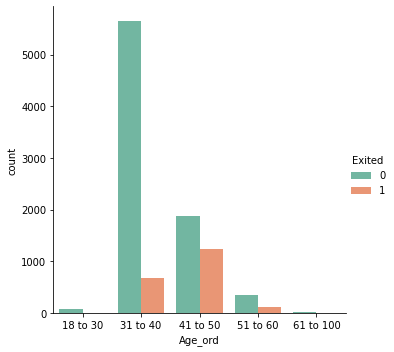

In [116]:
sns.catplot(x="Age_ord", kind="count",  palette="Set2", data= df,  hue = "Exited" )

- **Kunden zwischen 31-40 jahren haben eine CreditScore_ord von 501 zu 699**

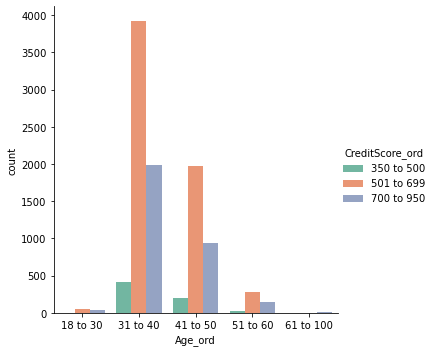

In [180]:
sns.catplot(x="Age_ord", kind="count", palette="Set2", data= df, hue = "CreditScore_ord" )

- **Die meisten Kunden sind zwischen 31-40 Jahren**

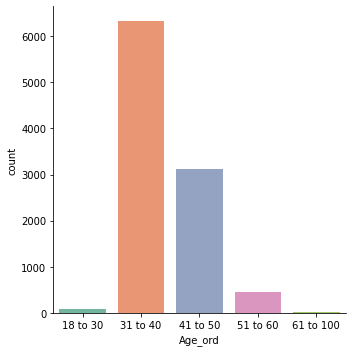

In [26]:
# alter mit Age-ord
import seaborn as sns
%matplotlib inline
sns.catplot(x="Age_ord",  kind="count",  palette="Set2",  data= df )

## 4.6 Interesse für Gehalt
- **Die Kunden haben ein EstimatedSalary in Höhe von 10.000 Dolar**


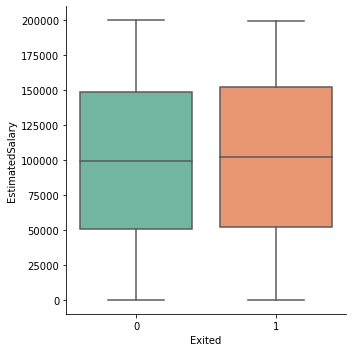

In [184]:
sns.catplot(x="Exited", kind="box", palette="Set2", data= df, y= "EstimatedSalary" )

## 4.7 Interesse für Land


- **5014 Kunden kommen aus Spanien und 4204 wollen bei der Bank bleiben**
- **2740 Kunden kommen aus Frankreich und 2064 wollen bei der Bank bleiben**
- **2509 Kunden kommen aus Deutschland und 1695 wollen bei der Bank bleiben**

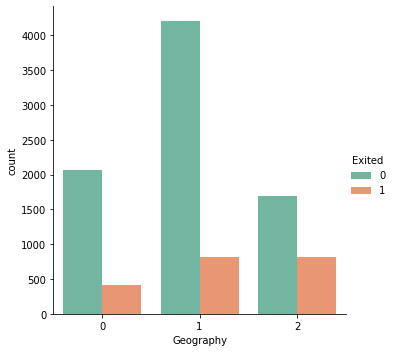

In [60]:
# Geography Franca : 0 Espanha :1 Alemanha 2 
sns.catplot(x="Geography", kind="count",  palette="Set2", data= df, hue = "Exited" )


In [61]:
df2 =df.groupby(["Geography"])['Exited'].count().to_frame().rename(columns={'id':'contador'}).reset_index()

In [62]:
df2.head()

,Geography,Exited
0,0,2477
1,1,5014
2,2,2509


In [63]:
group=df.groupby(["Geography",'Exited'])
print(group.size().reset_index(name='counts'))

   Geography  Exited  counts
0          0       0    2064
1          0       1     413
2          1       0    4204
3          1       1     810
4          2       0    1695
5          2       1     814


In [64]:
# 83,84% haben interesse für die Bank Spain :1
((df["Geography"]==1)&(df['Exited']==0)).sum()/5014

0.8384523334662943

- **Die Spanier sind die aktivsten Kunden**

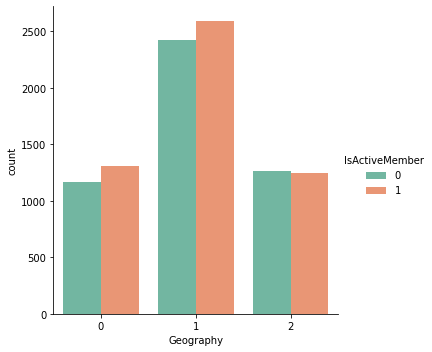

In [65]:
sns.catplot(x="Geography", kind="count", palette="Set2", data= df, hue = "IsActiveMember" )

- **Die meisten Kunden haben eine Bankkarte**

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

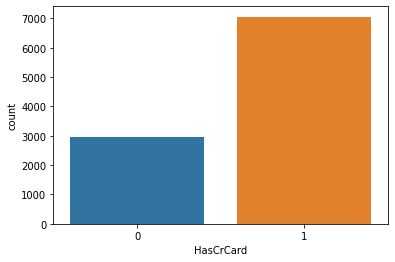

In [108]:
sns.countplot(x="HasCrCard",data=df)

- **Kunden, die eine Kreditkarte benutzen, bleiben meistens bei der Bank**

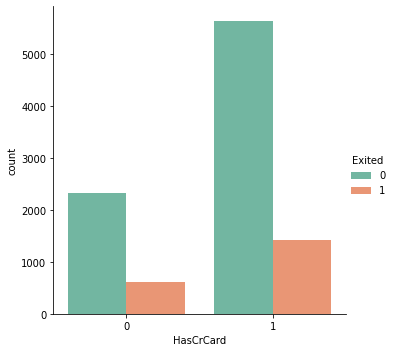

In [109]:
sns.catplot(x="HasCrCard", kind="count", palette="Set2", data= df, hue = "Exited" )

- **Kunden aus Spanien benutzen am meinsten eine Kreditkarte.**

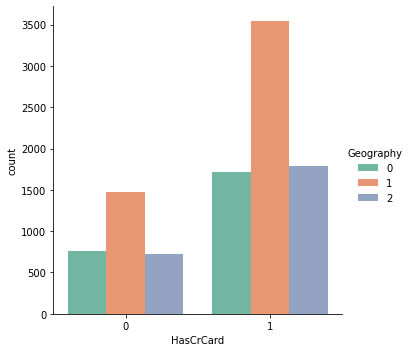

In [110]:
sns.catplot(x="HasCrCard", kind="count", palette="Set2", data= df, hue = "Geography" )

## 4.8 Interesse für Korrelation
- **Es gibt eine Korrelation zwischen Banlace und Geography von 0.33**


<AxesSubplot:>

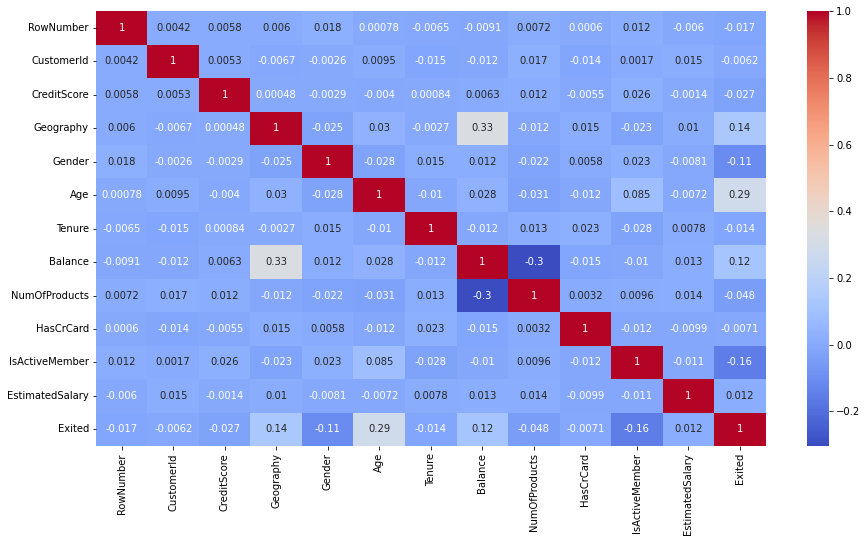

In [111]:
plt.figure(figsize = (15,8))
sns.heatmap(df3.corr(),cmap='coolwarm',annot=True)


## 4.9 Statistiken nach Gruppen auswerten

- **Kunden aus Deutschland mit 3 Produkten oder mehr verlassen die Bank mit einer grosser Wahrscheinlichkeit** 

In [112]:
pd.pivot_table(df, values='Exited', index=['Geography'], columns=['NumOfProducts'], aggfunc=np.mean)

NumOfProducts,1,2,3,4
Geography,,,,
0,0.218673,0.073542,0.787879,1.0
1,0.224344,0.057034,0.788462,1.0
2,0.428466,0.121154,0.895833,1.0


- **Kunden mit eine Balance_ord 200001 zu 250900 und eine Gehalt über 125000 haben eine große Wahrscheinlichkeit die Bank zu verlassen**

In [113]:
pd.pivot_table(df, values='Exited', index=['Balance_ord'], columns=['EstimatedSalary_ord'], aggfunc=np.mean)

EstimatedSalary_ord,0 to 25000,25001 to 50000,50001 to 75000,75001 to 100000,100001 to 125000,125001 to 150000,150001 to 175000,175001 to 200000
Balance_ord,,,,,,,,
0 to 25000,0.124464,0.133630,0.136674,0.136364,0.135255,0.146608,0.144828,0.156109
25001 to 50000,0.142857,0.375000,0.416667,0.333333,0.333333,0.375000,0.200000,0.272727
50001 to 100000,0.188889,0.144444,0.188119,0.220994,0.209756,0.191710,0.238095,0.210000
100001 to 200000,0.262032,0.261307,0.263502,0.213559,0.244224,0.245528,0.252577,0.258706
200001 to 250900,0.666667,1.000000,0.400000,0.750000,0.200000,0.500000,0.600000,0.750000


- **Männliche Kunden, die eine CrediScore von 350 bis 500 haben und zwischen 41 und 50 Jahren sind, verlassen die Bank mit einer Wahrscheinlichkeit von 0.45**

In [114]:
pd.pivot_table(df, values='Exited', index=['CreditScore_ord'], columns=['Age_ord'], aggfunc=np.mean)

Age_ord,18 to 30,31 to 40,41 to 50,51 to 60,61 to 100
CreditScore_ord,,,,,
350 to 500,0.000000,0.103365,0.492308,0.304348,1.0
501 to 699,0.075472,0.109411,0.385432,0.249123,0.0
700 to 950,0.030303,0.103968,0.398089,0.250000,0.0


In [115]:
print('Der durchschnittliche Alter der Kunden', df['Age'].mean())

Die durchschnitt alter von den Kunden 38.9218


In [98]:
print('Die Kunden sind durchschnittliche', df['Tenure'].mean(), 'Jahren bei der bank') 

Die Kunden sind durchschnitt 5.0128 bei der bank
